In [ ]:
import pandas as pd
import numpy as np

import os, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [7]:
data = pd.read_csv("datasets/life_expectancy_data.csv")
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1588,Malaysia,2013,Developing,74.6,128.0,3,0.53,110.677971,96.0,195,...,97.0,4.20,97.0,0.1,1882.278420,2976724.0,7.8,7.6,0.779,12.9
1587,Malaysia,2014,Developing,74.8,126.0,4,0.52,721.365543,96.0,221,...,97.0,4.17,97.0,0.1,11183.961910,322817.0,7.6,7.4,0.783,13.0
640,Costa Rica,2000,Developing,77.6,98.0,1,4.34,94.178195,89.0,0,...,8.0,7.12,88.0,0.1,388.363689,3925443.0,2.4,2.3,0.702,11.6
2673,Tunisia,2007,Developing,74.6,12.0,3,1.24,469.628292,98.0,4,...,98.0,5.64,98.0,0.1,3778.184171,129887.0,6.3,6.3,0.695,14.3
2596,The former Yugoslav republic of Macedonia,2004,Developing,73.5,12.0,0,2.07,0.000000,NaN,9,...,95.0,8.64,94.0,0.1,NaN,NaN,2.6,2.6,0.000,11.9


In [9]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
data = data.dropna()
data.shape

(1649, 22)

In [12]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
552,Chile,2007,Developing,78.9,9.0,2,7.39,209.487587,92.0,0,...,95.0,6.35,96.0,0.1,1526.877460,16491687.0,0.9,0.9,0.797,14.8
1982,Papua New Guinea,2008,Developing,61.4,29.0,11,0.81,103.727773,59.0,0,...,76.0,4.60,63.0,1.3,1178.724690,6787187.0,1.4,1.3,0.469,8.9
1531,Lithuania,2006,Developed,76.0,229.0,0,12.70,116.504961,95.0,1,...,94.0,6.20,94.0,0.1,924.642548,326999.0,3.0,3.0,0.807,16.4
1971,Panama,2003,Developing,75.5,126.0,1,5.52,58.459760,98.0,0,...,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
328,Bosnia and Herzegovina,2007,Developing,75.4,16.0,0,5.16,8.240356,94.0,166,...,95.0,8.37,95.0,0.1,418.292176,3774.0,2.8,2.8,0.703,12.9


In [13]:
data["Status"].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [14]:
data["Country"].value_counts()

Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64

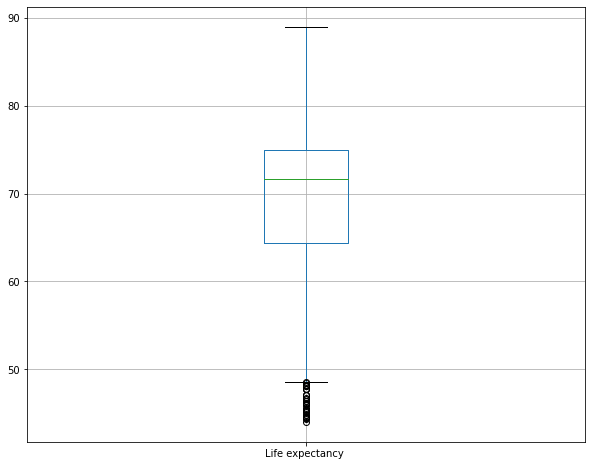

In [16]:
plt.figure(figsize=(10, 8))
data.boxplot('Life expectancy ')
plt.show()

d:\development\softwares\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


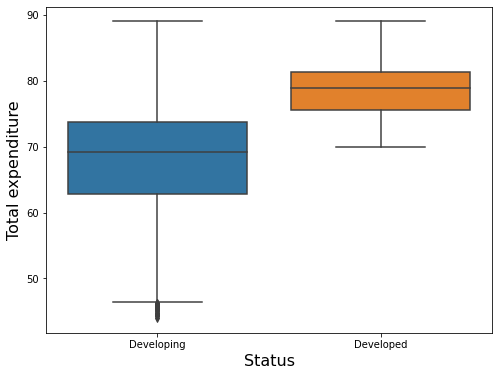

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot('Status', 'Life expectancy ', data=data)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Total expenditure', fontsize=16)
plt.show()

In [22]:
data_corr = data[['Life expectancy ', 'Adult Mortality', 'Schooling', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.702523,0.727630,0.174718,0.341331,0.441322,-0.022305
Adult Mortality,-0.702523,1.000000,-0.421171,-0.085227,-0.191429,-0.255035,-0.015012
Schooling,0.727630,-0.421171,1.000000,0.243783,0.350398,0.467947,-0.040312
Total expenditure,0.174718,-0.085227,0.243783,1.000000,0.129915,0.180373,-0.079962
Diphtheria,0.341331,-0.191429,0.350398,0.129915,1.000000,0.158438,-0.039898
GDP,0.441322,-0.255035,0.467947,0.180373,0.158438,1.000000,-0.020369
Population,-0.022305,-0.015012,-0.040312,-0.079962,-0.039898,-0.020369,1.000000


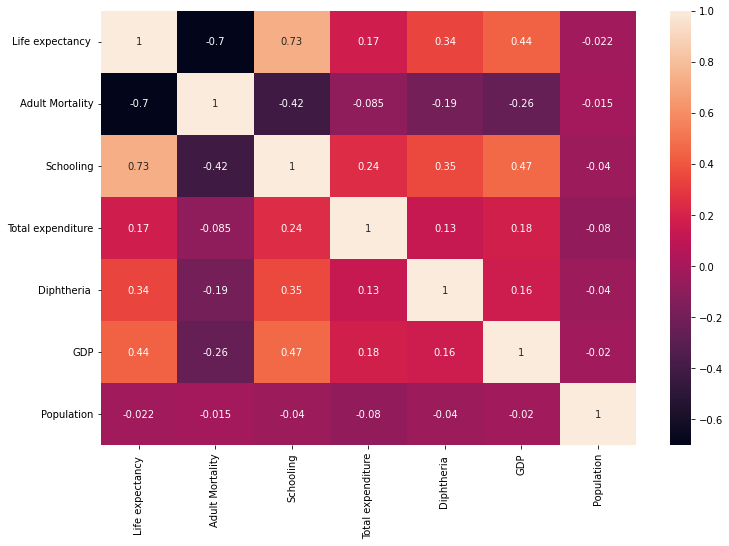

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data_corr, annot=True)
plt.show()

In [25]:
features = data.drop('Life expectancy ', axis=1)
target = data[['Life expectancy ']]
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
target.sample(5)

,Life expectancy
1472,73.0
1866,73.2
386,74.1
938,89.0
1375,52.1


In [40]:
features = features.drop('Country', axis=1)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [41]:
categorical_features = features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [42]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
numeric_features = features.drop(['Status'], axis = 1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [44]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01


In [45]:
standardScalar = StandardScaler()

numeric_features = pd.DataFrame(standardScalar.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,-7.962905e-15,1.000303,-1.918650,-0.695101,0.039029,0.773159,1.751998
Adult Mortality,1649.0,-7.756076e-17,1.000303,-1.334813,-0.728135,-0.161371,0.469255,4.428626
infant deaths,1649.0,-4.308931e-18,1.000303,-0.269455,-0.261178,-0.244623,-0.087352,12.974422
Alcohol,1649.0,6.894290e-17,1.000303,-1.122948,-0.924336,-0.184509,0.696829,3.311051
percentage expenditure,1649.0,2.585359e-17,1.000303,-0.397439,-0.376151,-0.314933,-0.107798,10.384044
Hepatitis B,1649.0,1.637394e-16,1.000303,-3.016682,-0.203841,0.382167,0.655638,0.772839
Measles,1649.0,-4.308931e-18,1.000303,-0.220624,-0.220624,-0.219136,-0.183630,12.815610
BMI,1649.0,-6.894290e-17,1.000303,-1.829459,-0.943305,0.282120,0.894832,1.973408
under-five deaths,1649.0,-2.585359e-17,1.000303,-0.271541,-0.265401,-0.246979,-0.093462,12.623872
Polio,1649.0,2.574586e-16,1.000303,-3.589622,-0.114267,0.420403,0.598626,0.687738


In [46]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.751998,0.756629,0.243745,-1.122948,-0.356909,-0.555446,-0.106171,-0.963560,0.238134,-3.455955,...,-0.887941,-0.312389,-0.434239,0.270913,2.685909,2.663654,-0.833462,-0.722799,0,1
1,1.507289,0.820490,0.260300,-1.122948,-0.355633,-0.672648,-0.171828,-0.988878,0.256557,-1.139051,...,-1.027006,-0.312389,-0.431760,-0.203382,2.751157,2.706643,-0.849853,-0.758583,0,1
2,1.262579,0.796542,0.276854,-1.122948,-0.355806,-0.594514,-0.177977,-1.014197,0.274979,-0.960828,...,-0.934296,-0.312389,-0.430100,0.242452,2.794656,2.749632,-0.882634,-0.794367,0,1
3,1.017869,0.828472,0.301687,-1.122948,-0.352983,-0.477312,0.055789,-1.039516,0.299541,-0.738049,...,-0.795231,-0.312389,-0.426769,-0.155548,2.838155,2.814116,-0.920878,-0.830151,0,1
4,0.773159,0.852420,0.318242,-1.122948,-0.393403,-0.438245,0.078203,-1.059771,0.324104,-0.693493,...,-0.748876,-0.312389,-0.479628,-0.165747,2.903403,2.857105,-0.970049,-0.937503,0,1


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [50]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((1319, 21), (330, 21)), ((1319, 1), (330, 1)))

In [53]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape = (x_train.shape[1],),activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss = 'mse', metrics=['mae', 'mse'], optimizer=optimizer)

    return model

In [54]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [59]:
# !pip install pydot
# !pip install graphviz
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
